In [46]:
!sshfs -o reconnect,ServerAliveInterval=120,ServerAliveCountMax=3 rennes.g5k:/srv/storage/empenn@storage2.rennes.grid5000.fr/private/ymerel /home/ymerel/storage

fusermount3: failed to access mountpoint /home/ymerel/storage: Permission denied


In [47]:
import os

datadir = os.path.join('data')
ds_path = os.path.join(datadir, 'normalized_dataset.csv')
corr_path = os.path.join(datadir, 'correlations.csv')
corr_func = 'pearson'
basedir = "/home/ymerel/storage/results/"
jobname = "auditory_sosym"
result_path = f"{basedir}{jobname}"

# Load data

In [48]:
import numpy as np
import pandas as pd

dataset = pd.read_csv(ds_path, delimiter=';')

print(f"{len(dataset)} configs in dataset")

correlations = pd.read_csv(corr_path, delimiter=';')
print(f"{len(correlations)} correlations in matrix")

matrix = correlations.pivot(index='source', columns='target', values=corr_func).fillna(1.0)

dataset.head(1010)

1001 configs in dataset
1004004 correlations in matrix


,slice_timing_correction/ref_slice/middle,distorsion_correction,signal_modeling/temporal_noise_autocorrelation/FAST,slice_timing_correction,signal_modeling/temporal_noise_autocorrelation/AR1,spatial_normalization/algorithm/linear,motion_correction_realignment/register_to/mean,signal_modeling/hrf/temporal_derivs,spatial_normalization/algorithm/DARTEL,signal_modeling/hrf/canonical,...,spatial_normalization/bias_fwhm,spatial_smoothing/fwhm,spatial_normalization/interpolation/trilinear,spatial_normalization/template/MNI305,spatial_normalization/interpolation/bspline,id,pearson_from_ref,spearman_from_ref,pearson_from_mean,spearman_from_mean
0,False,False,True,False,False,False,True,True,False,False,...,0,6,False,False,False,d73e0359ec51c3b847656b8f2bc157b083dae2057d53a4...,0.103517,0.082454,0.263128,0.245781
1,False,False,True,True,False,False,False,False,False,True,...,0,6,True,False,False,e012bd4d9bab5a18593441c76f48ccc732bca3390703ff...,0.149047,0.124797,0.337434,0.305455
2,True,False,True,True,False,False,False,True,False,False,...,0,6,True,False,False,850e4d92a370900eede8982155772f1ba014ab468eef7c...,0.956003,0.882291,0.854730,0.697912
3,False,False,True,True,False,False,False,True,False,False,...,0,6,True,False,False,84c27a9d96a41f520b1de0bf3ef88093bcf9761b45e45e...,0.724838,0.588650,0.760644,0.584104
4,False,False,True,True,False,False,True,False,False,False,...,0,6,True,False,False,0c7beba1bec8f4ff1c5ebff7e2af248230c4ce91c27775...,0.095768,0.074215,0.272972,0.252439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,True,False,False,True,True,False,True,False,False,False,...,0,6,True,False,False,478226e8b91fd9e223848097af04e9841a0c7c8bebe003...,0.900571,0.798534,0.815145,0.667142
997,False,False,False,False,True,False,True,True,False,False,...,0,6,False,False,False,49b2e420e59aac429dbf460a5814461a2b645eb20f2387...,0.872822,0.767594,0.786408,0.635235
998,False,False,False,True,True,False,False,False,False,True,...,0,6,False,False,True,2a1e8f3ad608486da7eb9f165fa6389c641a895232a3dc...,0.657927,0.548311,0.758439,0.600097
999,True,False,True,True,False,False,True,False,False,True,...,0,6,False,False,False,cd5f0844e445d6ab574976706eb2929d22072940c7433e...,0.562473,0.446034,0.774017,0.610582


# Compute dendogram, medoids and anti-medoids

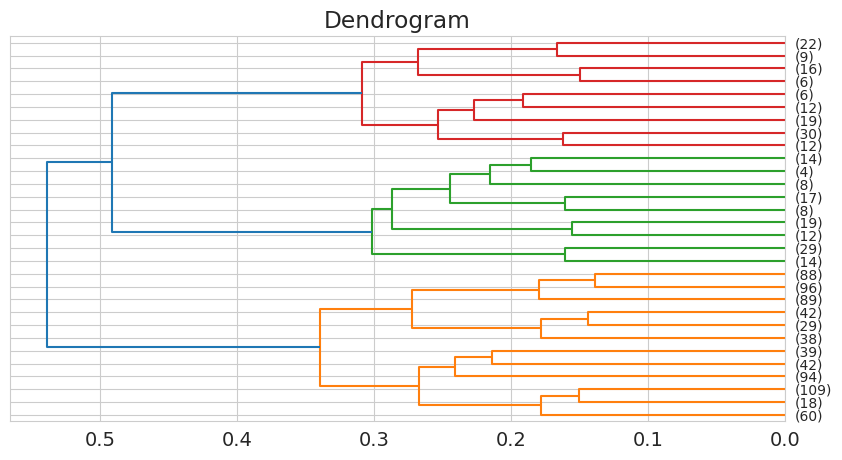

In [49]:
from utils import clusterize_hierch, predict_clusters, get_cluster_distance_densities, get_cluster_cophenetic,get_cluster_silhouette, get_cluster_inertia, get_davies_bouldin, get_medoids, get_antimedoids
from plot_utils import plot_brain
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

all_results = []

threshold = 0.20

# cluster on whole dataset
ds, distance_matrix, Z, clusters = clusterize_hierch(dataset, correlations, dataset['id'], None, corr_func, threshold)

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='lastp', distance_sort=True, orientation='left')
plt.title('Dendrogram')
plt.show()

medoids = get_medoids(distance_matrix, clusters)
# sort by cluster label
medoids = {k: medoids[k] for k in sorted(medoids.keys())} 
antimedoids = get_antimedoids(distance_matrix, clusters)

# Plot clusters (medoids, antimedoids)

Cluster [1] - Correlation to ref [0.6891056020890185] - Medoid [127b969509d273a745cd11d160f50a3ce762ec6147bf47313f91d4b06f736f98]


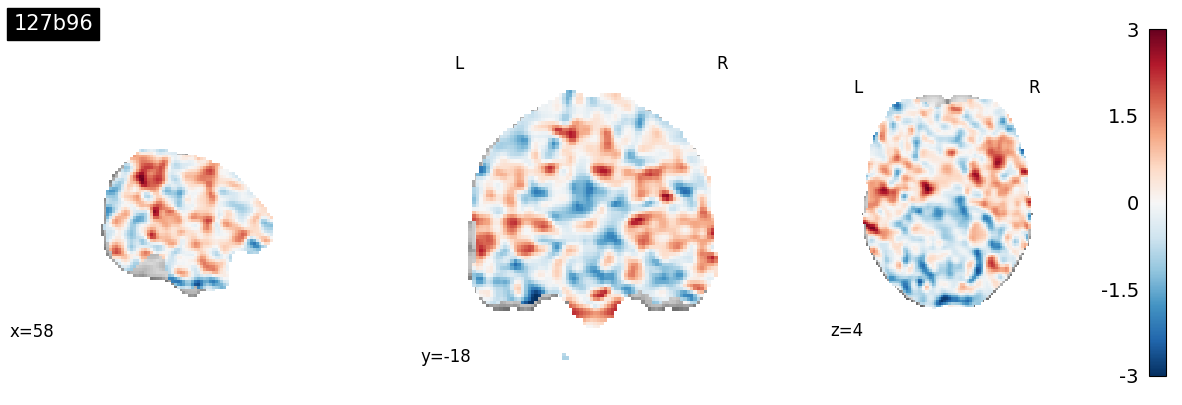

Cluster [1] - Antimedoid


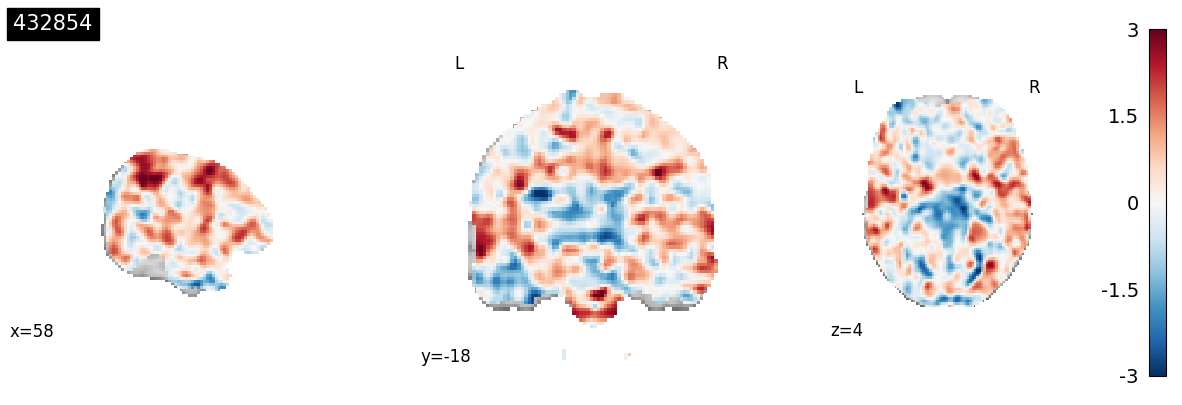

Cluster [2] - Correlation to ref [0.906763867566404] - Medoid [df1a734ce96602627be9fbe70a32c087ed49679f521a2d437a0a2583107870ed]


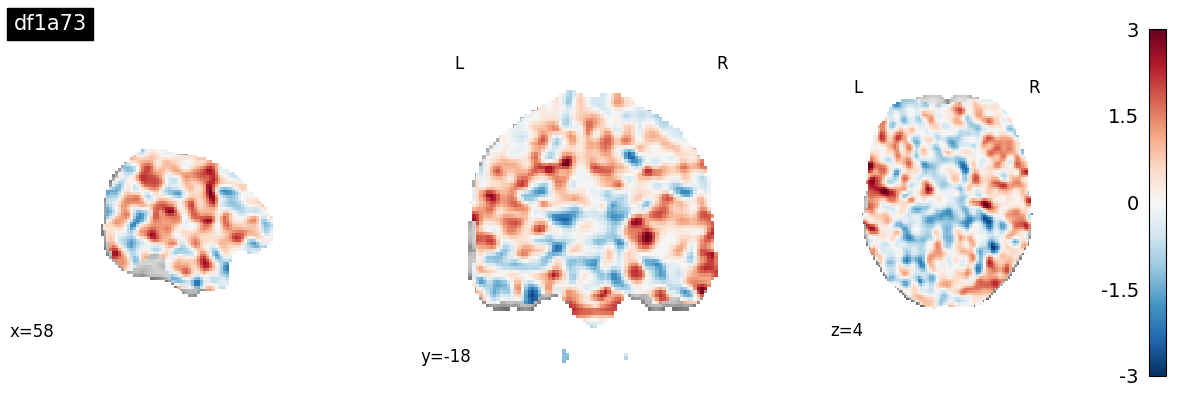

Cluster [2] - Antimedoid


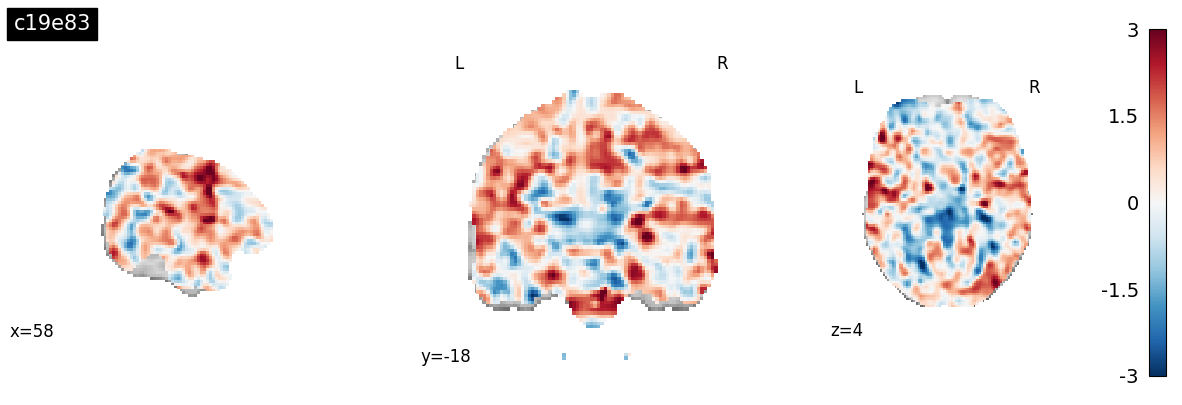

Cluster [3] - Correlation to ref [0.7189056526899287] - Medoid [2233bf1a099ea00052c45c23ddffb5195c0e8b908ab2be5e13ebcaf9dd3c204f]


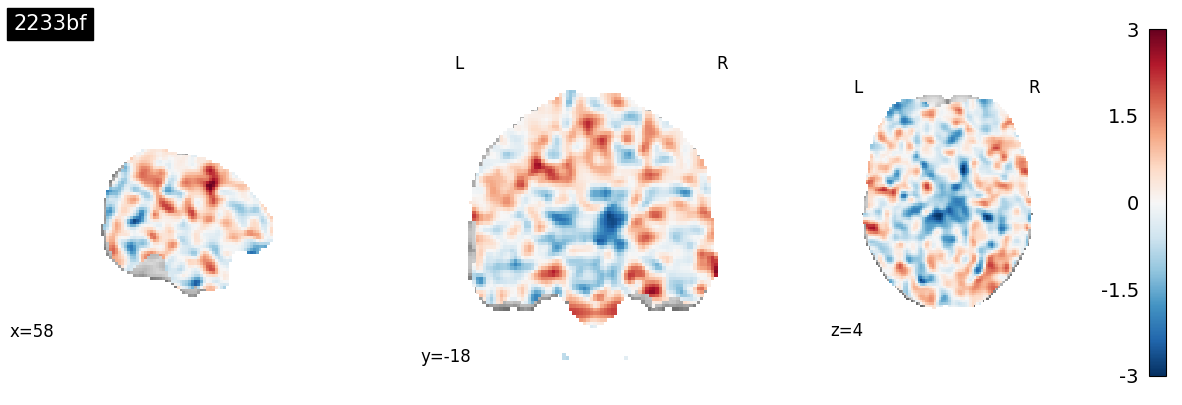

Cluster [3] - Antimedoid


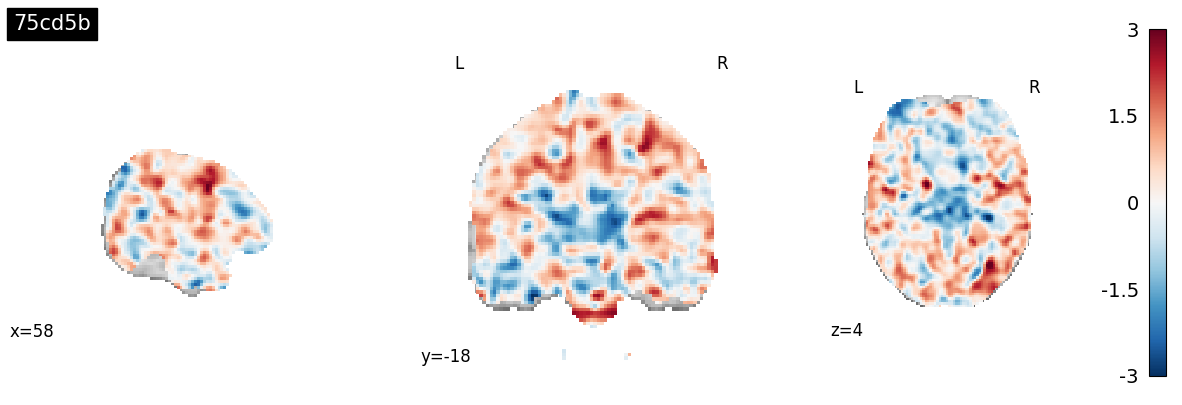

Cluster [4] - Correlation to ref [0.6228069315356133] - Medoid [8fd5f18c33d0b6cde9ae7d90d8129d293db679d4d73a2d3027c5ba474d07ca1d]


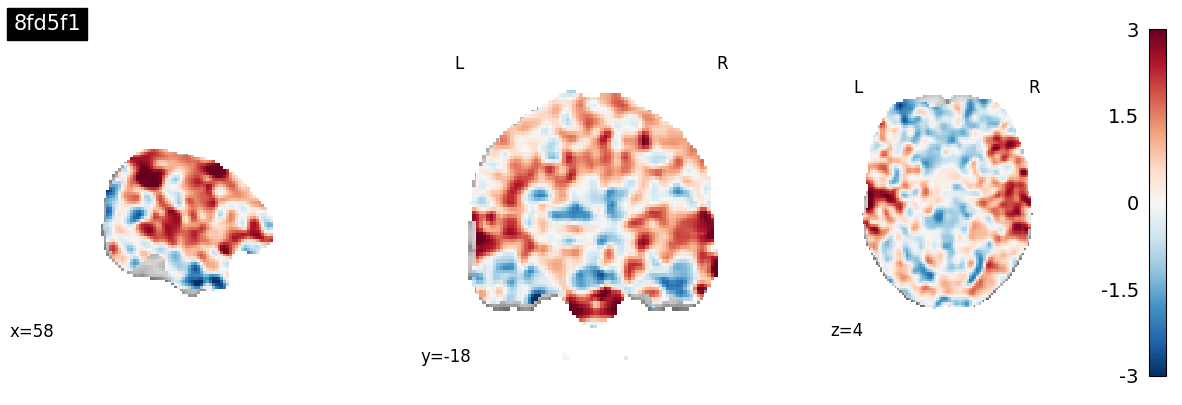

Cluster [4] - Antimedoid


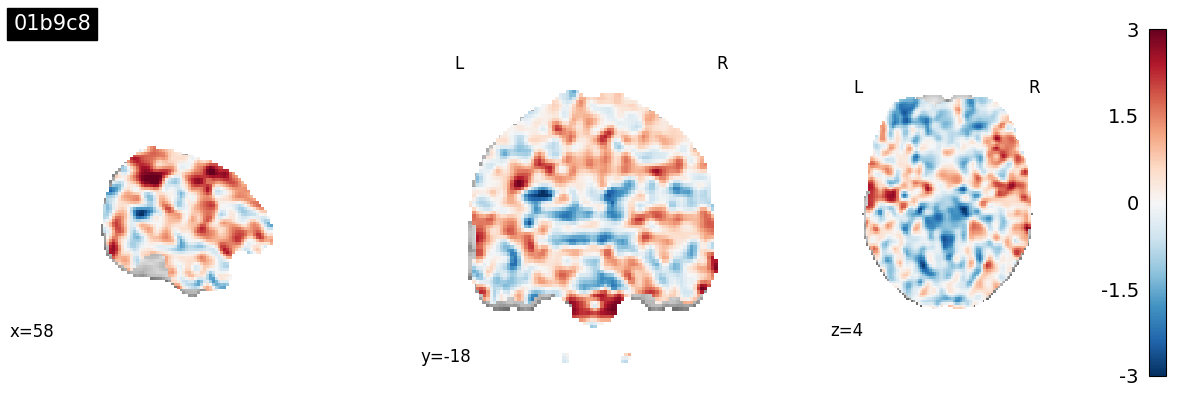

Cluster [5] - Correlation to ref [0.7507992217987395] - Medoid [fa302cc866133ce3bf28e2cbb7d97e282bc1da4cc6d97c29f18917b7a43969a3]


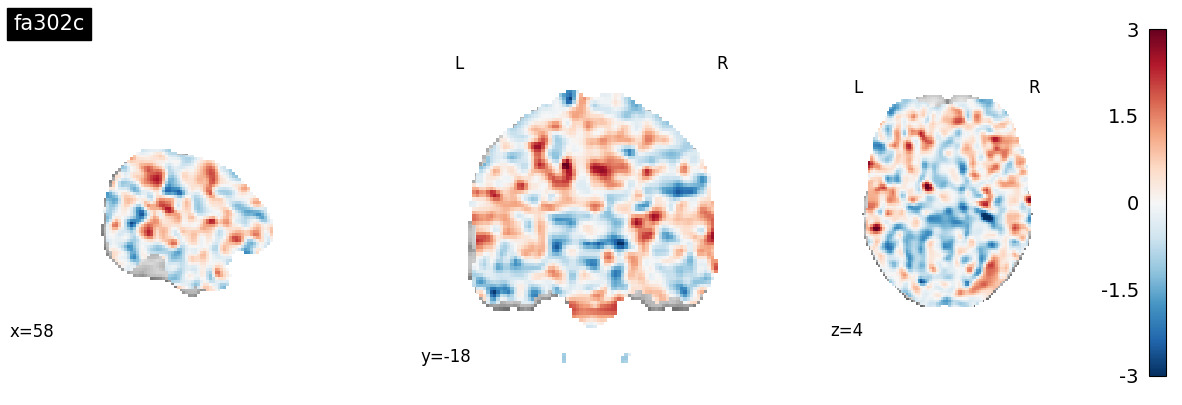

Cluster [5] - Antimedoid


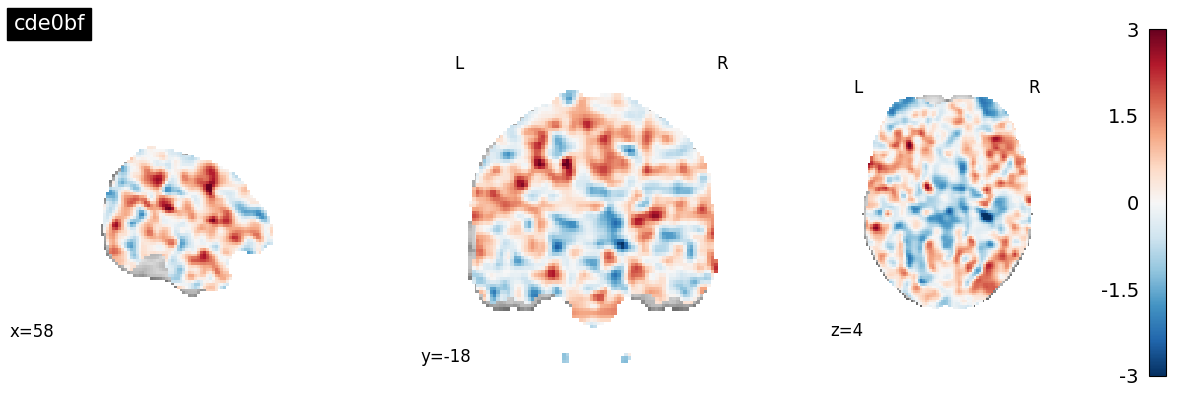

Cluster [6] - Correlation to ref [0.6737601694986738] - Medoid [becb63e42fca44ca1583be059f08f80cbebab422e61fb0378d62d02a48359158]


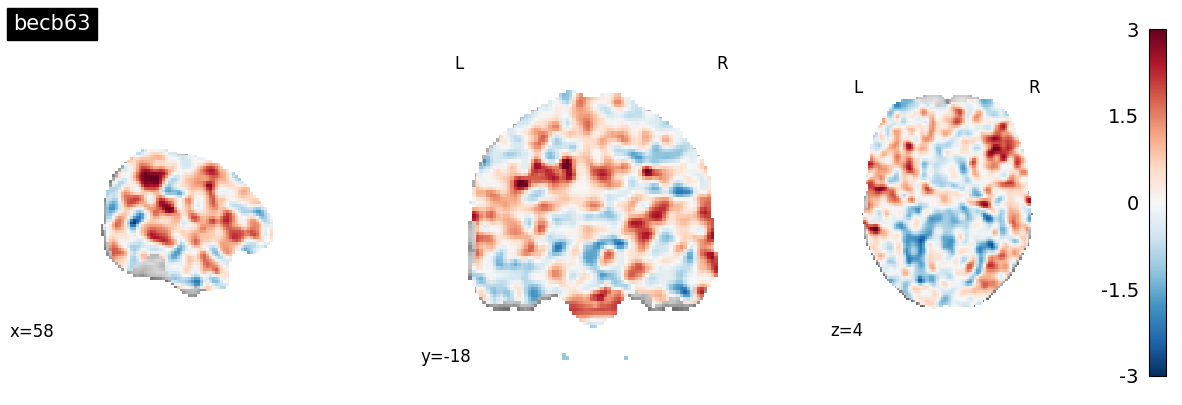

Cluster [6] - Antimedoid


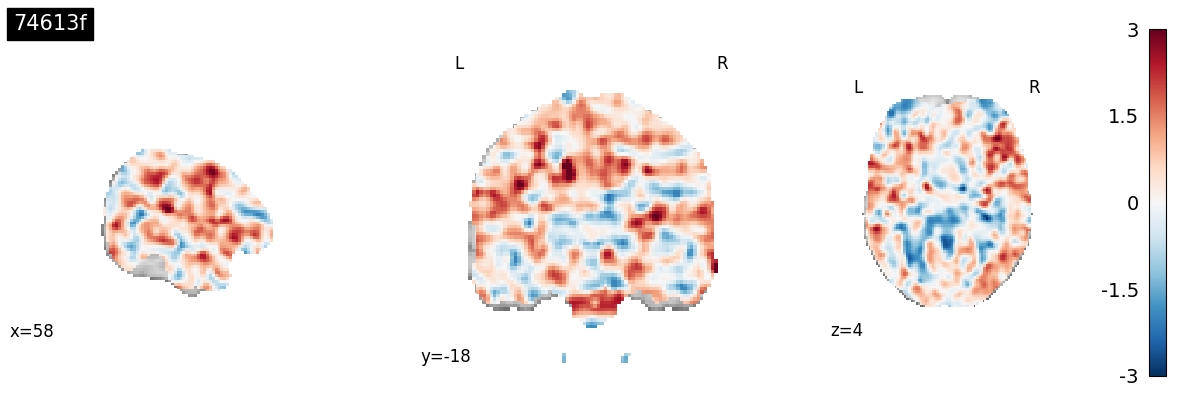

Cluster [7] - Correlation to ref [0.1078005947979871] - Medoid [ca66cc35ae738d5d54aa8ce9e9a1001054151345b7727692ba48fd2205acf0d4]


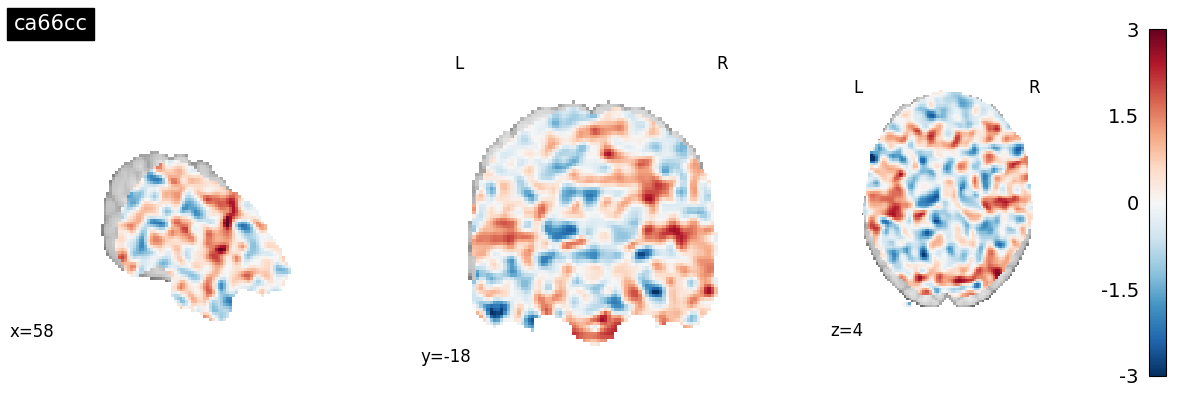

Cluster [7] - Antimedoid


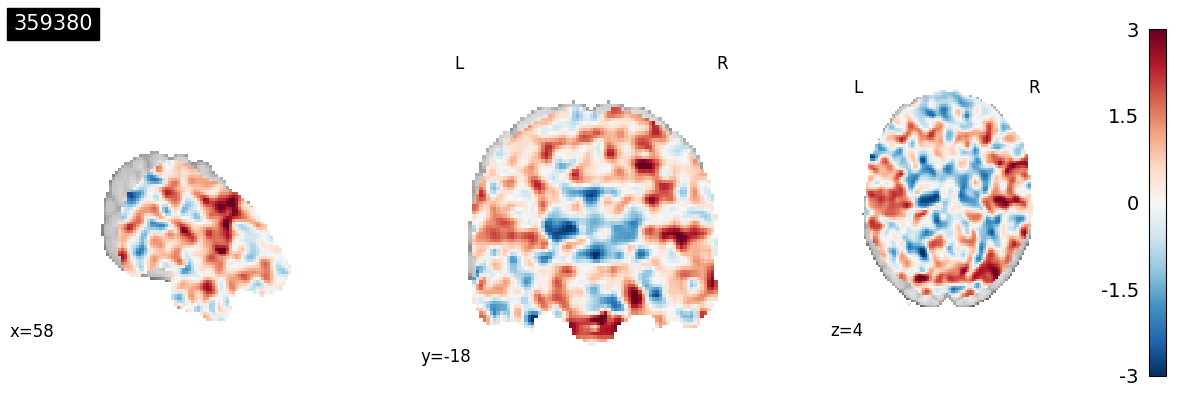

Cluster [8] - Correlation to ref [0.1572696437766511] - Medoid [b7061a9df796bb82f41788fb5917a224038f02bf357f84e7dec72e16081f22b7]


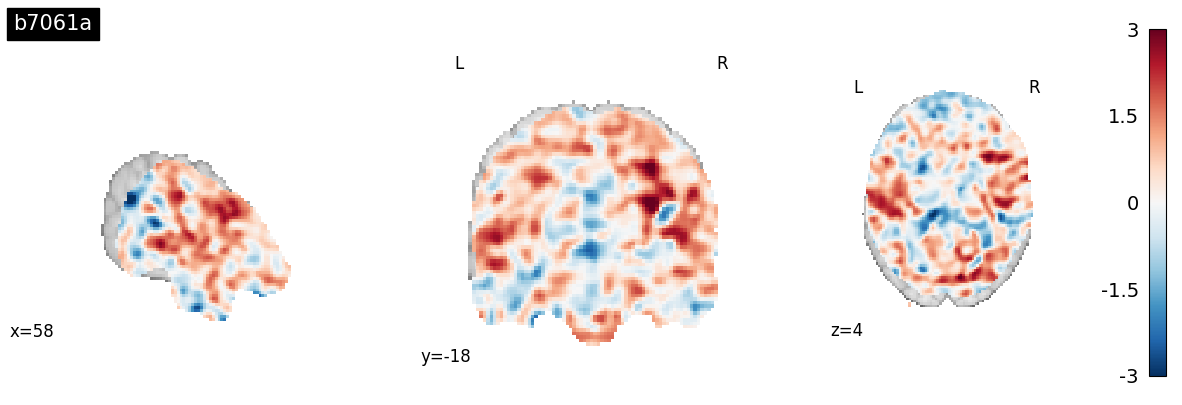

Cluster [8] - Antimedoid


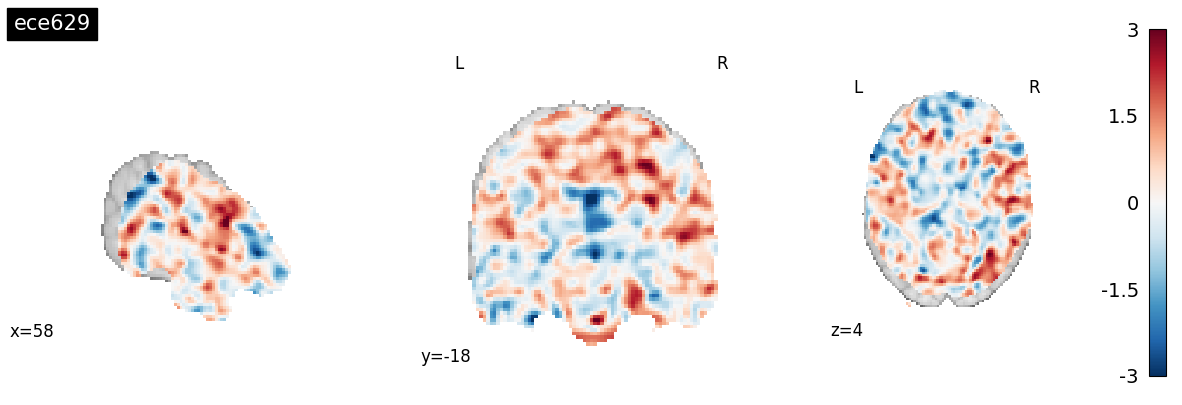

Cluster [9] - Correlation to ref [0.0919789827653515] - Medoid [c4dbd4c0b37d541c0773e77e3750bc8d8a16363b174e7d055967ce9133298984]


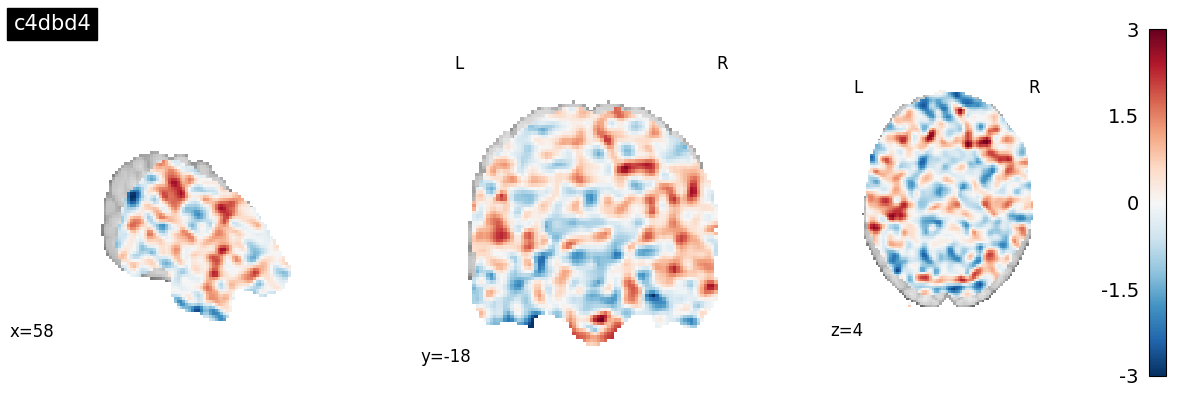

Cluster [9] - Antimedoid


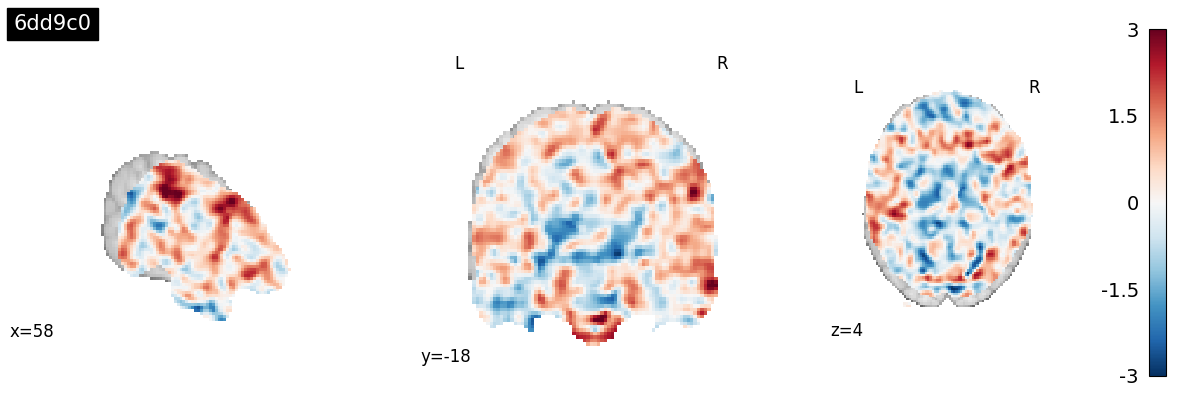

Cluster [10] - Correlation to ref [0.0672624989776423] - Medoid [112e3be187eae8fadc0df161f903b7a4fa3c1449755b5f39948054bdb2469c1d]


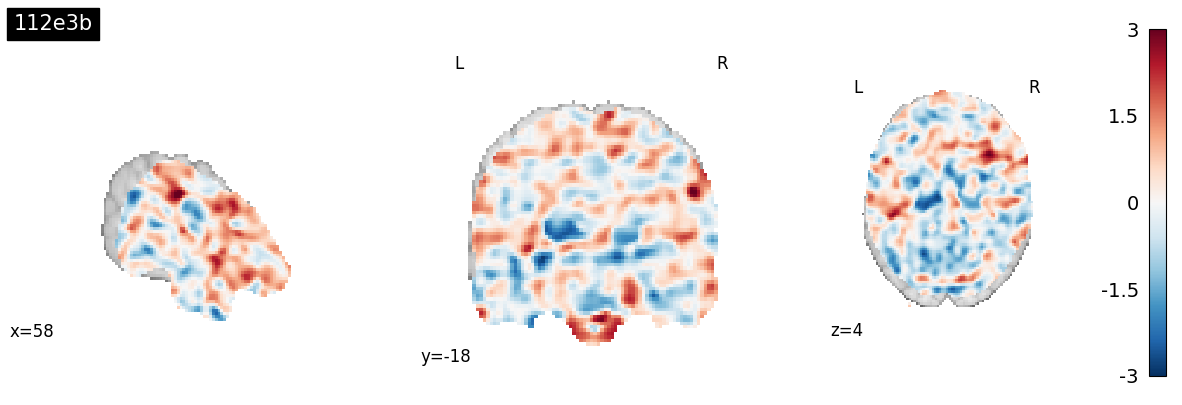

Cluster [10] - Antimedoid


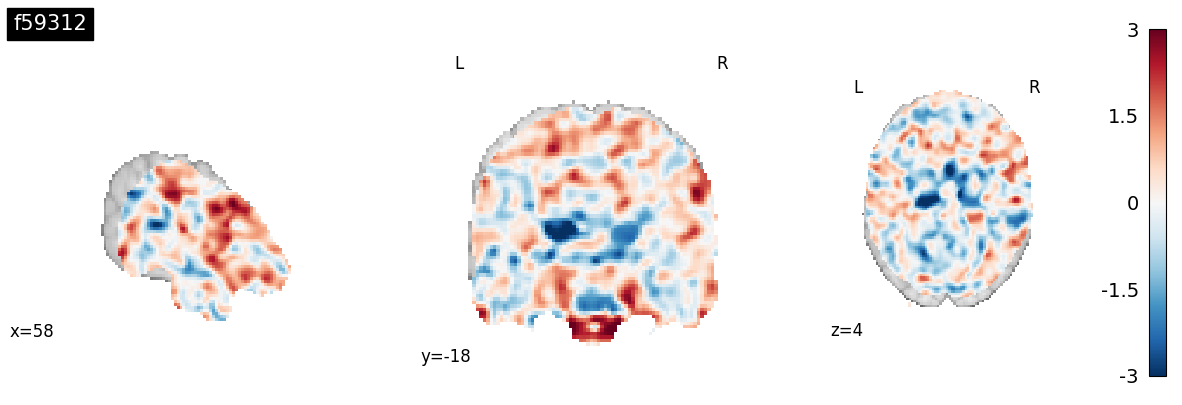

Cluster [11] - Correlation to ref [0.1390326840687195] - Medoid [f4af186fe8fb7659e90bcbb159a07376b39a3e64e75e7dae695c69bafbf137a9]


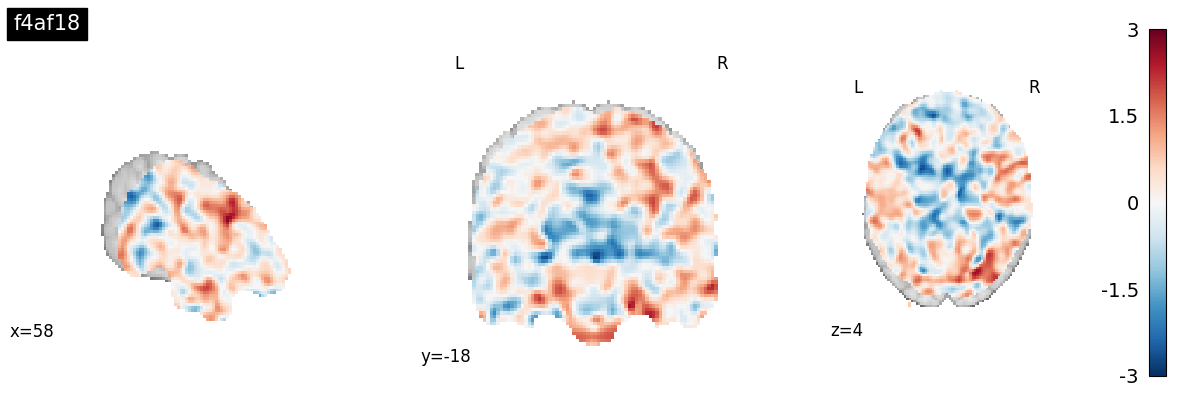

Cluster [11] - Antimedoid


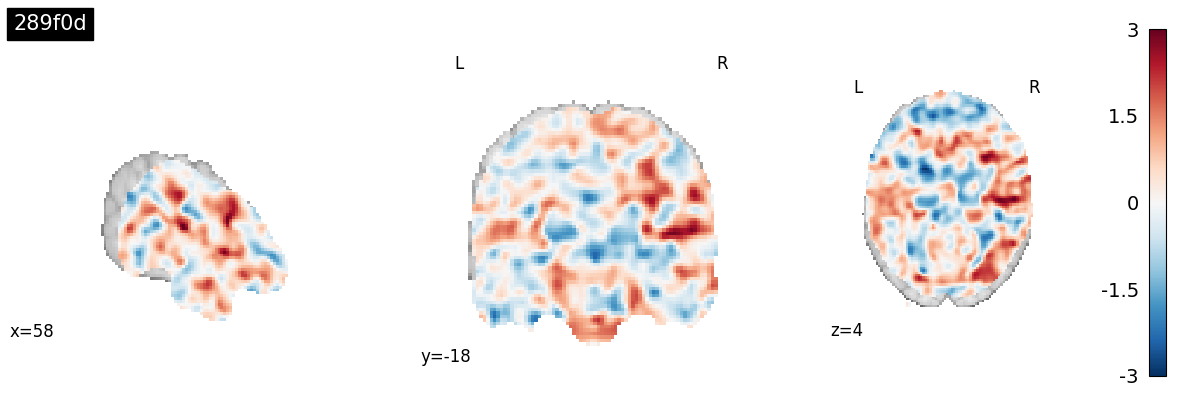

Cluster [12] - Correlation to ref [0.0957684644559846] - Medoid [0c7beba1bec8f4ff1c5ebff7e2af248230c4ce91c277751ff035fe2b84549194]


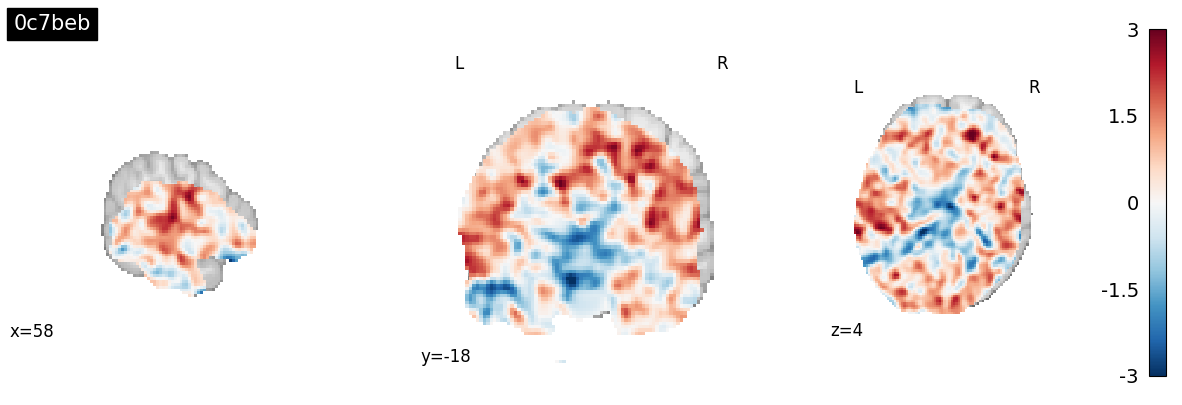

Cluster [12] - Antimedoid


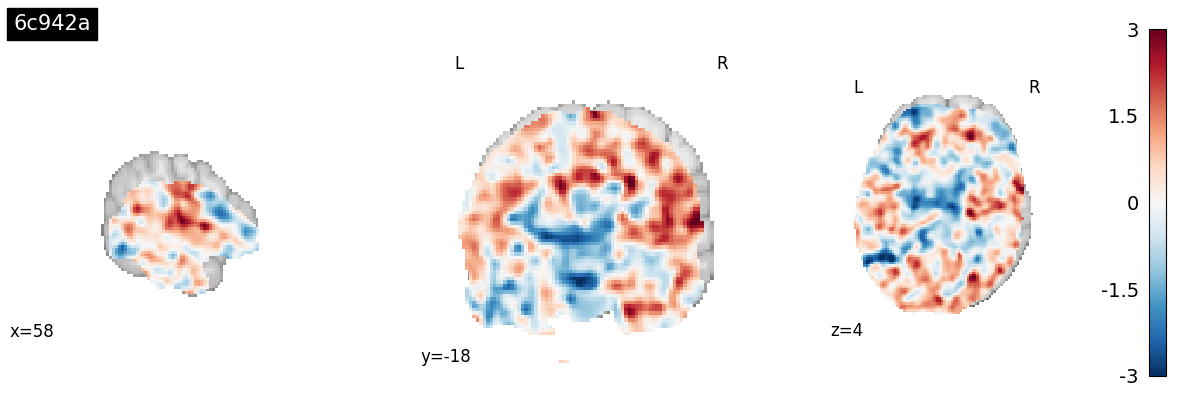

Cluster [13] - Correlation to ref [0.0450345536265148] - Medoid [0a247c3d426e3f41c6eb7296143644375e69efb2aa451debf757ea924b9bd41d]


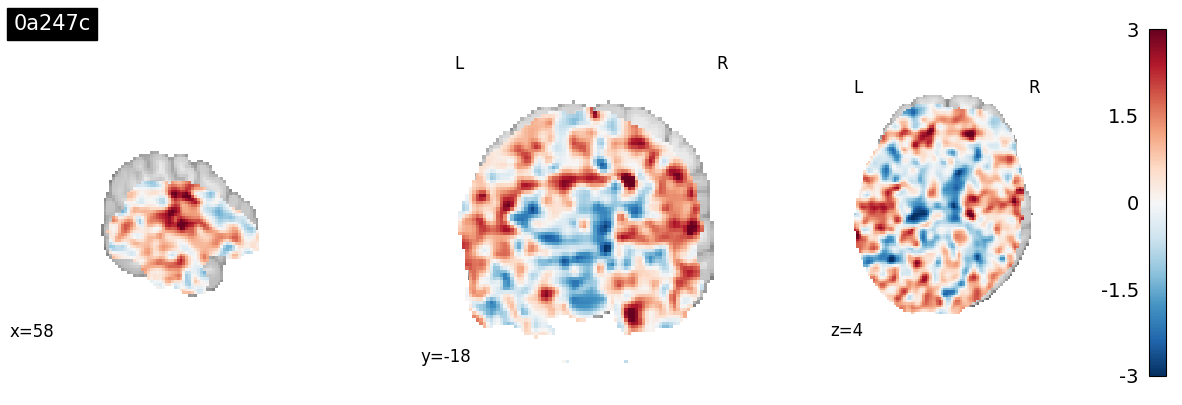

Cluster [13] - Antimedoid


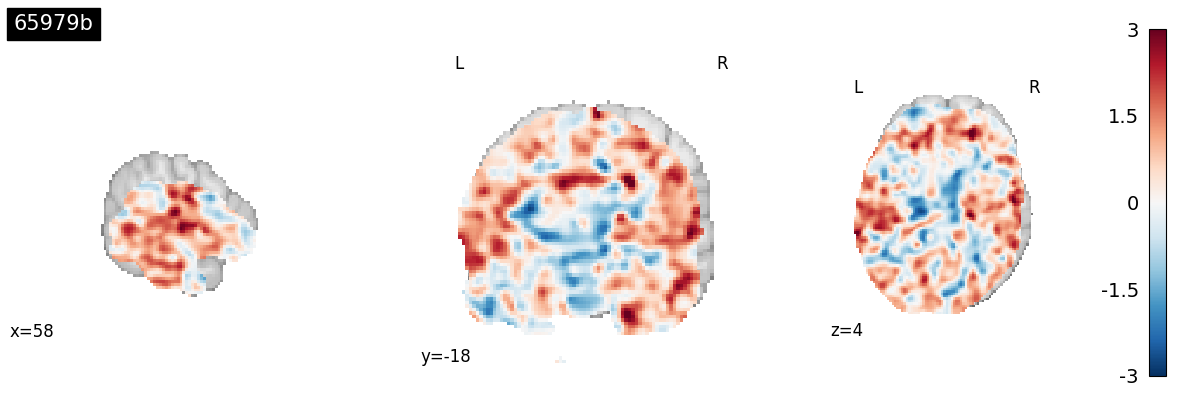

Cluster [14] - Correlation to ref [-0.0154165200768644] - Medoid [bc5b2602dbb6d72fa9f3e806ead7dd6d3f68ce99b5888457c2404047c974cec3]


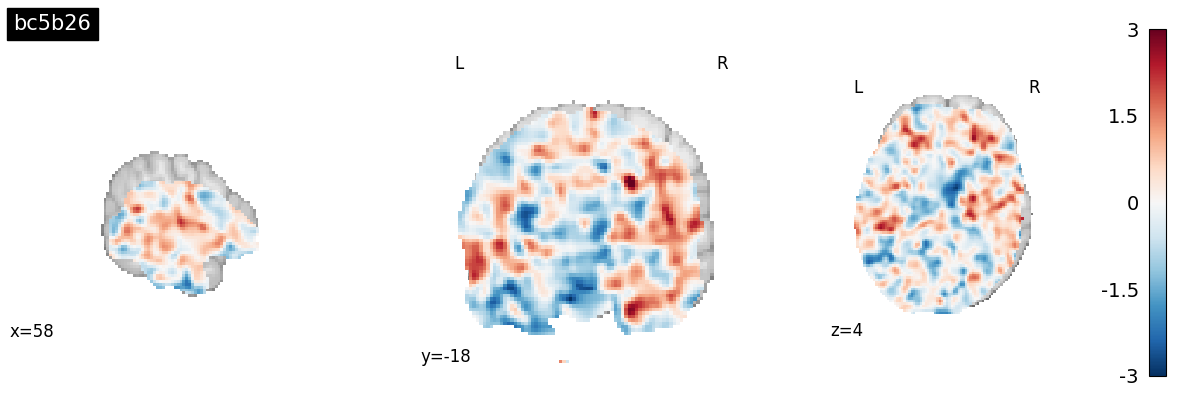

Cluster [14] - Antimedoid


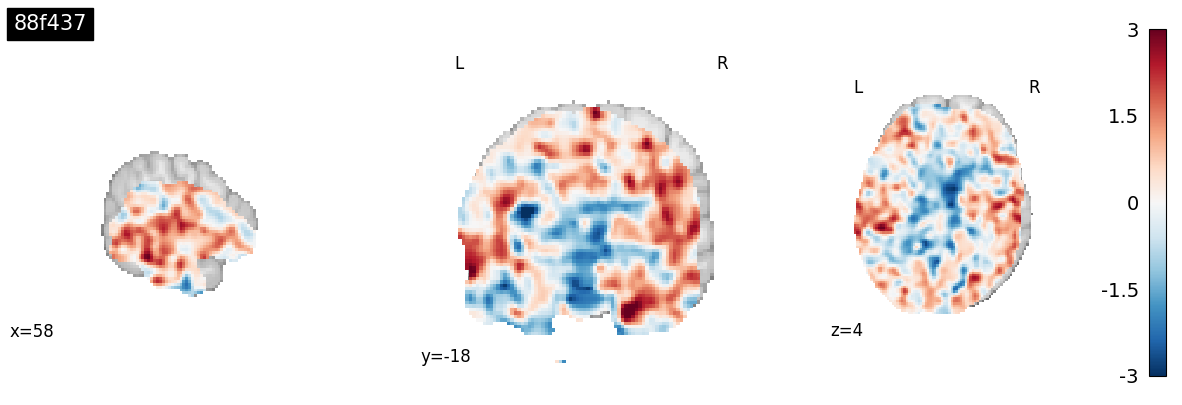

Cluster [15] - Correlation to ref [0.048539753927577] - Medoid [0905226678bd32d62887eb84a96181bc3ad431b21e04f72228f3be110efef261]


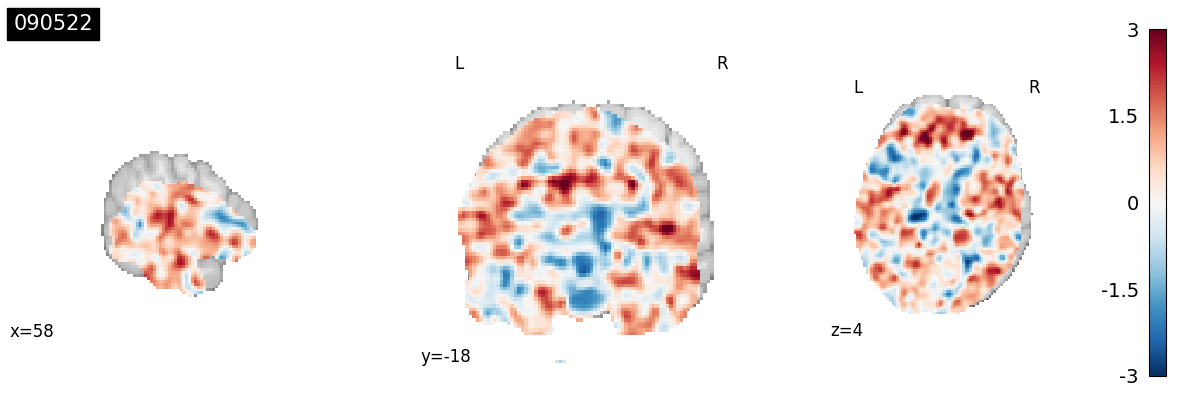

Cluster [15] - Antimedoid


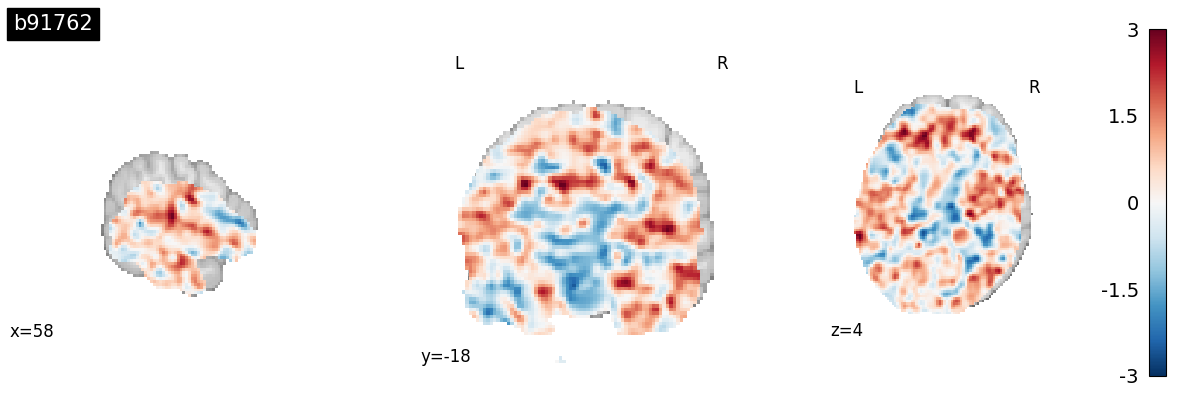

Cluster [16] - Correlation to ref [-0.0339127614490101] - Medoid [60073cf3c8285fcf997a15eb339017fe1fb91158ae7ce09227732e0e6367098c]


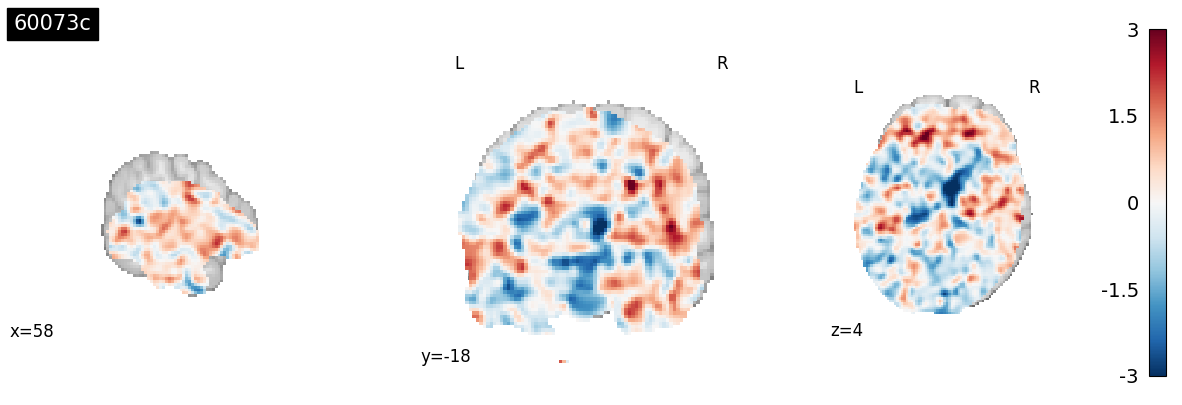

Cluster [16] - Antimedoid


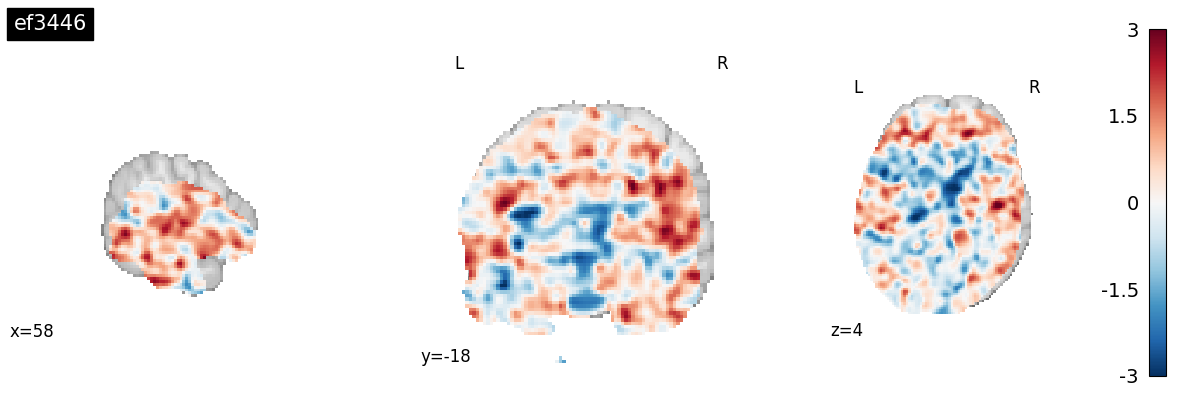

In [50]:
coords = [58, -18, 4]
for key, value in medoids.items():
    print(f"Cluster [{key}] - Correlation to ref [{dataset.loc[dataset['id'] == value, f'{corr_func}_from_ref'].values[0]}] - Medoid [{value}]")
    img_path = os.path.join(result_path, value, 'spmT_0001.nii')
    plot_brain(img_path, None, coords)
    print(f"Cluster [{key}] - Antimedoid")
    img_path = os.path.join(result_path, antimedoids[key], 'spmT_0001.nii')
    plot_brain(img_path, None, coords)

# Define Valid / Invalid clusters

In [51]:
all_clusters = clusters.unique().tolist()
valid_clusters = [1, 2, 3, 4, 5, 6]
invalid_clusters = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

print(f"Valid clusters: {len(valid_clusters)}/{len(all_clusters)}")
print(f"Invalid clusters: {len(invalid_clusters)}/{len(all_clusters)}")

Valid clusters: 6/16
Invalid clusters: 10/16


In [52]:
print(f"Excludes {len(invalid_clusters)} clusters")

valid_ds = ds[~ds['cluster'].isin(invalid_clusters)]
valid_ds.to_csv(os.path.join(datadir, f'valid_dataset.csv'), index=False, sep=';')
print(f"Valids : {len(valid_ds)}")

invalid_ds = ds[ds['cluster'].isin(invalid_clusters)]
invalid_ds.to_csv(os.path.join(datadir, f'invalid_dataset.csv'), index=False,sep=';') 
print(f"Invalids : {len(invalid_ds)}")

Excludes 10 clusters
Valids : 744
Invalids : 257


# Plot clusters by distance from reference / mean result

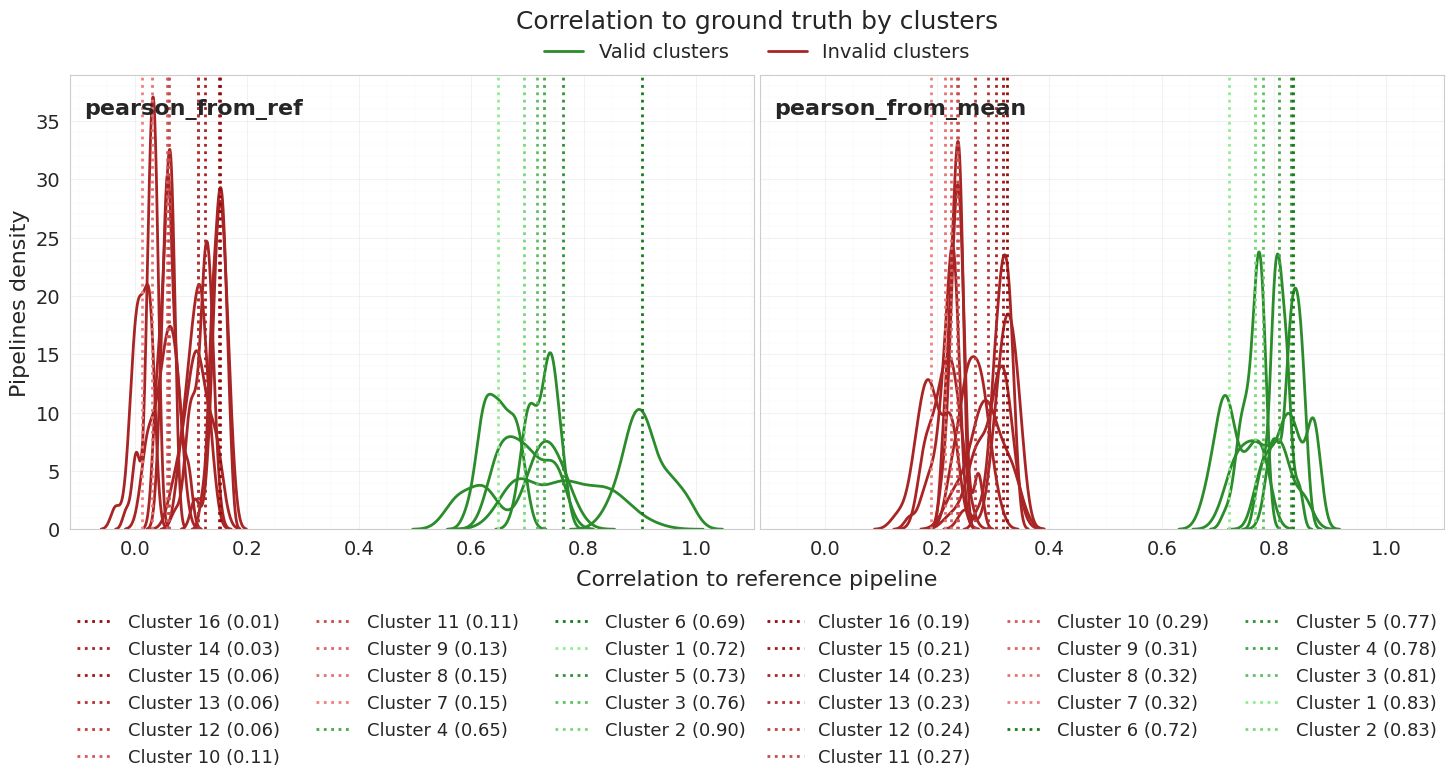

In [54]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib.colors import LinearSegmentedColormap
import os

# Define the tasks and their respective directories
truths = [f'{corr_func}_from_ref', f'{corr_func}_from_mean']

# Create a figure with two subplots side by side, increased width and height
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True, sharex=True)
fig.suptitle('Correlation to ground truth by clusters', fontsize=18, y=0.85)

# Define colormaps for green and red shades
green_cmap = LinearSegmentedColormap.from_list('green_shades', ['lightgreen', 'darkgreen'], N=100)
red_cmap = LinearSegmentedColormap.from_list('red_shades', ['lightcoral', 'darkred'], N=100)

plt.rcParams.update({'font.size': 14})

# Use the same shades for the legend as in the plots
valid_shade = green_cmap(0.7)
invalid_shade = red_cmap(0.7)

# Create a single legend for Valid/Invalid (no cluster count)
legend_handles = [
    plt.Line2D([0], [0], color=valid_shade, lw=2, label='Valid clusters'),
    plt.Line2D([0], [0], color=invalid_shade, lw=2, label='Invalid clusters')
]
fig.legend(handles=legend_handles, loc='upper center',
           ncol=2, frameon=False, fontsize=14,
           bbox_to_anchor=(0.5, 0.83))

i = 0
for truth in truths:
    datasets = {
        'Valid': pd.read_csv(os.path.join(datadir, 'valid_dataset.csv'), delimiter=';'),
        'Invalid': pd.read_csv(os.path.join(datadir, 'invalid_dataset.csv'), delimiter=';')
    }

    # Dictionary to store stats and medoids
    stats = {}
    medoids = {}

    # Calculate stats and find medoids for each dataset
    for label, df in datasets.items():
        stats[label] = {'mean': df[truth].mean()}
        cluster_medoids = {}
        for cluster in sorted(df['cluster'].unique()):
            cluster_data = df[df['cluster'] == cluster][truth].values.reshape(-1, 1)
            distances = cdist(cluster_data, cluster_data)
            medoid_idx = np.argmin(distances.sum(axis=1))
            cluster_medoids[int(cluster)] = cluster_data[medoid_idx][0]
        medoids[label] = cluster_medoids

    # Custom legend handles for medoids (to be placed under each subplot)
    medoid_legend_handles = []

    # Plot Invalid and Valid for the current truth
    for label in ['Invalid', 'Valid']:
        df = datasets[label]
        cmap = green_cmap if label == 'Valid' else red_cmap

        cluster_color = valid_shade if label == 'Valid' else invalid_shade

        for cluster in sorted(df['cluster'].unique()):
            cluster_data = df[df['cluster'] == cluster]
            sb.kdeplot(
                cluster_data[truth],
                color=cluster_color,
                linewidth=2,
                ax=axes[i]
            )

        # Plot medoids for each cluster (colored to match cluster)
        sorted_medoids = sorted(medoids[label].items(), key=lambda x: x[1])
        for j, (cluster, medoid) in enumerate(sorted_medoids):
            medoid_color = cmap(j / len(sorted_medoids))  # Distinct shade for medoids
            axes[i].axvline(medoid, color=medoid_color, linestyle=':', linewidth=2)

        # Add medoid entries to the legend handles
        for cluster, medoid in sorted_medoids:
            medoid_color = cmap(list(medoids[label].keys()).index(cluster) / len(medoids[label]))
            medoid_legend_handles.append(plt.Line2D([0], [0],
                color=medoid_color,
                linestyle=':', lw=2, label=f'Cluster {cluster} ({medoid:.2f})'))

    # Add task name in the top left or top right of each subplot
    axes[i].text(0.02, 0.95, f'{truth}',
                     transform=axes[i].transAxes,
                     fontsize=16, fontweight='bold',
                     verticalalignment='top')

    axes[i].grid(True)

    # Add medoids legend under each subplot
    if len(medoid_legend_handles) == 4:
        cols = 2
    else:
        cols = 3

    axes[i].legend(handles=medoid_legend_handles, loc='upper center',
                   bbox_to_anchor=(0.5, -0.15), ncol=cols, frameon=False, fontsize=13)
    i += 1

# Set y-label only for the left subplot
axes[0].set_ylabel('Pipelines density', fontsize=16)

# Remove x-axis labels for both subplots
for ax in axes:
    ax.set_xlabel('')

    # Major grid
    ax.grid(True, which='major', linestyle='-', linewidth=0.75, alpha=0.25)

    # Minor ticks and grid
    ax.minorticks_on()
    ax.grid(True, which='minor', linestyle='-', linewidth=0.25, alpha=0.15)

    ax.set_axisbelow(True)  # Ensure grid is below data

# Add a single x-axis label centered below both subplots
fig.text(0.5, 0.13, 'Correlation to reference pipeline', ha='center', fontsize=16)

# Adjust layout to maximize plot width and prevent legend clipping
plt.tight_layout(rect=[0.02, 0.05, 0.98, 0.85])
plt.subplots_adjust(wspace=0.01, bottom=0.2)
plt.savefig("corr_to_ref.svg")
plt.show()


{'min': np.float64(0.5615066863086847), 'max': np.float64(1.0), 'mean': np.float64(0.7327224685758215)}
{'min': np.float64(-0.0339127614490101), 'max': np.float64(0.1744926012519096), 'mean': np.float64(0.08642328275729037)}


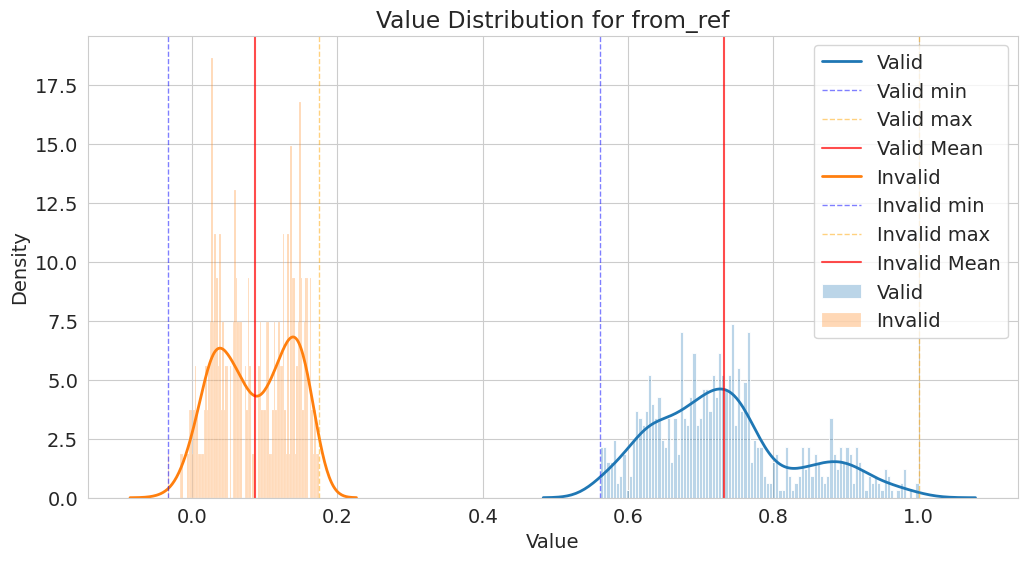

In [55]:
import seaborn as sb
# Create a dictionary to loop over the datasets
datasets = {
    'Valid': valid_ds,
    'Invalid': invalid_ds
}

# Calculate min, max, and mean for each dataset
stats = {}
for label, df in datasets.items():
    stats[label] = {
        'min': df[f'{corr_func}_from_ref'].min(),
        'max': df[f'{corr_func}_from_ref'].max(),
        'mean': df[f'{corr_func}_from_ref'].mean()
    }
    print(stats[label])

# Plot
plt.figure(figsize=(12, 6))
for label, df in datasets.items():
    sb.histplot(
        df[f'{corr_func}_from_ref'],
        bins=100,
        alpha=0.3,
        label=label,
        kde=False,
        stat='density'
    )
    sb.kdeplot(
        df[f'{corr_func}_from_ref'],
        label=label,
        linewidth=2
    )
    # Add vertical lines for min, max, and mean
    plt.axvline(stats[label]['min'], color='blue', linestyle='--', alpha=0.5, linewidth=1, label=f'{label} min')
    plt.axvline(stats[label]['max'], color='orange', linestyle='--', alpha=0.5, linewidth=1, label=f'{label} max')
    plt.axvline(stats[label]['mean'], color='red', linestyle='-', alpha=0.7, linewidth=1.5, label=f'{label} Mean')

plt.title('Value Distribution for from_ref')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

{'min': np.float64(0.678269930240187), 'max': np.float64(0.8838714751483533), 'mean': np.float64(0.8077322427744679)}
{'min': np.float64(0.1304627519472488), 'max': np.float64(0.3460313192978688), 'mean': np.float64(0.25997736792598847)}


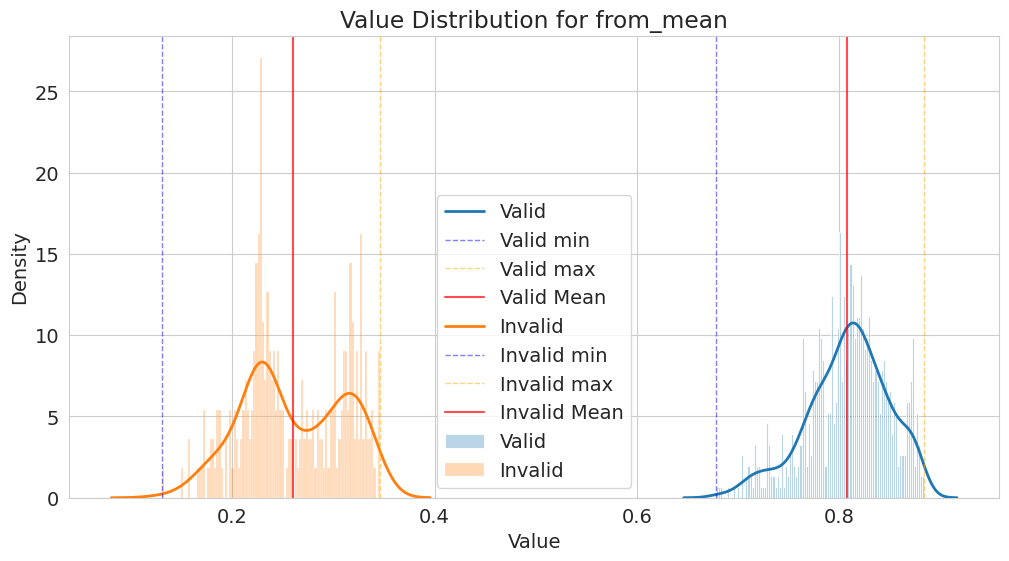

In [56]:
import seaborn as sb
# Create a dictionary to loop over the datasets
datasets = {
    'Valid': valid_ds,
    'Invalid': invalid_ds
}

# Calculate min, max, and mean for each dataset
stats = {}
for label, df in datasets.items():
    stats[label] = {
        'min': df[f'{corr_func}_from_mean'].min(),
        'max': df[f'{corr_func}_from_mean'].max(),
        'mean': df[f'{corr_func}_from_mean'].mean()
    }
    print(stats[label])

# Plot
plt.figure(figsize=(12, 6))
for label, df in datasets.items():
    sb.histplot(
        df[f'{corr_func}_from_mean'],
        bins=100,
        alpha=0.3,
        label=label,
        kde=False,
        stat='density'
    )
    sb.kdeplot(
        df[f'{corr_func}_from_mean'],
        label=label,
        linewidth=2
    )
    # Add vertical lines for min, max, and mean
    plt.axvline(stats[label]['min'], color='blue', linestyle='--', alpha=0.5, linewidth=1, label=f'{label} min')
    plt.axvline(stats[label]['max'], color='orange', linestyle='--', alpha=0.5, linewidth=1, label=f'{label} max')
    plt.axvline(stats[label]['mean'], color='red', linestyle='-', alpha=0.7, linewidth=1.5, label=f'{label} Mean')

plt.title('Value Distribution for from_mean')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()